In [1]:
from fastai.vision.all import *
#from fastai.vision import *
from fastai.metrics import *
#from fastbook import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
import torchvision

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
torch.cuda.empty_cache()

In [6]:
# Set path to root directory
path = Path('flower_data/')

In [7]:
# View all files in directory
path.ls()

(#7) [Path('flower_data/.ipynb_checkpoints'),Path('flower_data/cat_to_name.json'),Path('flower_data/data link.txt'),Path('flower_data/export.pkl'),Path('flower_data/test'),Path('flower_data/train'),Path('flower_data/valid')]

In [8]:
# We are creating a fastai DataBunch from our dataset
# Preprocessing takes place when creating the databunch
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataLoaders.from_folder(path, train='train', valid='valid',item_tfms=Resize(224), size=224, bs=16,num_workers=0)

In [9]:
data.vocab

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']

In [10]:
#cat_to_name.to_csv('flower_category.csv')

In [11]:
# See the classes and count of classes in your dataset
print(data.vocab,data.c)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'] 102


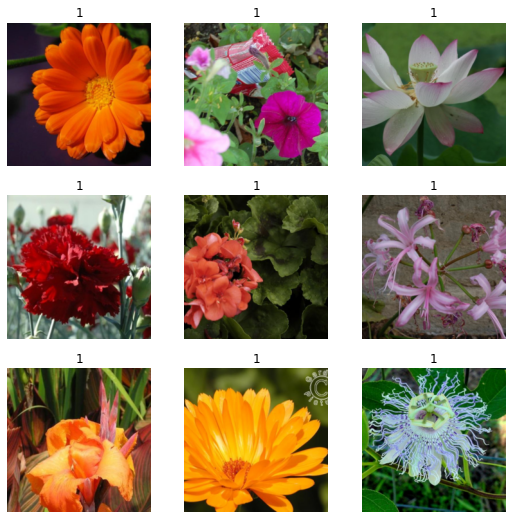

In [15]:
# Show what the data looks like after being transformed
data.show_batch()

In [16]:
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

6552 818


In [17]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.vgg19_bn, metrics = [accuracy,Precision(average='micro'),Recall(average='micro'),F1Score(average='micro')],)

In [18]:
defaults.device = torch.device('cuda')

In [19]:
# Train the model on 5 epochs of data at the default learning rate
#learn.fit_one_cycle(5)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.471613,0.571158,0.841076,0.841076,0.841076,0.841076,06:46


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.531144,0.239249,0.940098,0.940098,0.940098,0.940098,03:26
1,0.381844,0.190310,0.943765,0.943765,0.943765,0.943765,03:38
2,0.203639,0.122232,0.975550,0.975550,0.975550,0.975550,03:44
3,0.062656,0.097189,0.977995,0.977995,0.977995,0.977995,03:47
4,0.042371,0.079107,0.985330,0.985330,0.985330,0.985330,03:49


In [20]:
# Rebuild interpreter and replot confusion matrix
#interp = ClassificationInterpretation.from_learner(learn)

In [21]:
learn.export()

# Prediction Started

In [22]:
#import torch
from fastai.vision.all import Path,load_learner,Image
import numpy as np
#from fastai.vision import *
import pandas as pd

In [23]:
df = pd.read_csv("Flowers.csv",index_col=['Index'])

In [24]:
path = Path('flower_data/export.pkl')

In [25]:
learn = load_learner(path)

In [26]:
import PIL.Image
import numpy as np

In [27]:
pil_img = PIL.Image.open('flower_data/valid/77/image_00112.jpg')

In [28]:
img = np.asarray(pil_img)

In [29]:
learn.predict(img)

('77',
 tensor(77),
 tensor([2.4623e-09, 8.8004e-09, 1.2048e-09, 5.5753e-11, 7.9014e-10, 1.1464e-11,
         1.3186e-09, 2.9844e-09, 2.8024e-09, 9.7260e-11, 6.6316e-11, 3.7850e-10,
         1.7976e-09, 4.5505e-09, 1.2177e-10, 1.5556e-10, 8.6834e-12, 1.0516e-10,
         8.5810e-11, 1.0815e-09, 7.2319e-10, 2.8400e-11, 1.8723e-10, 4.5418e-10,
         6.8264e-09, 1.0925e-10, 1.2875e-10, 8.1548e-12, 2.4863e-11, 2.0720e-09,
         4.8489e-11, 5.4507e-10, 3.2547e-11, 2.0456e-11, 1.5870e-08, 1.8374e-10,
         3.0622e-10, 4.6590e-09, 7.7341e-10, 1.8334e-10, 1.3977e-09, 9.1827e-10,
         2.7754e-09, 2.4846e-12, 3.3389e-12, 4.1167e-09, 2.0059e-10, 4.4036e-12,
         3.6662e-09, 1.5619e-11, 2.1958e-10, 8.4114e-10, 2.9512e-10, 5.7781e-12,
         1.6382e-13, 1.2761e-10, 4.7955e-11, 1.4658e-10, 1.1555e-10, 1.7867e-10,
         1.4718e-09, 3.1824e-10, 1.1738e-10, 2.7574e-10, 2.9133e-11, 1.5625e-08,
         2.3624e-11, 1.0780e-11, 1.1072e-09, 1.3123e-09, 9.2325e-12, 2.3156e-09,
        

In [30]:
round(np.max(np.array(learn.predict(img)[2]))*100,2)

100.0

In [31]:
def get_name(cat_num):
    return df[df.index == cat_num].reset_index(drop=True)['Cat_Name'][0]
def get_details(cat_num):
    return df[df.index == cat_num].T.reset_index().rename(columns={"index": "Major", 1: "Description"})[1:]

In [32]:
def predict_img(img):
    pil_img = PIL.Image.open(img)
    img = np.asarray(pil_img) # Image to display   
    return get_details(int(learn.predict(img)[0])),round(np.max(np.array(learn.predict(img)[2]))*100,2)

In [33]:
pred_class, prob = predict_img('flower_data/valid/100/image_07895.jpg')

In [34]:
pred_class

Index,Major,100
1,Scientific Name,Gailllardia
2,Location,Native to North and South America
3,Genus,Gaillardia Foug
4,Family,Asteraceae
5,Species,Approximately 20 different species
6,Bloom Time,Earli summer


In [35]:
prob

100.0

In [36]:
print("Flower Name:  [" + str(pred_class) + "] " + "| Probability: [" + str(prob) + '%]')

Flower Name:  [Index            Major                                 100
1      Scientific Name                         Gailllardia
2             Location   Native to North and South America
3                Genus                     Gaillardia Foug
4               Family                          Asteraceae
5              Species  Approximately 20 different species
6           Bloom Time                        Earli summer] | Probability: [100.0%]


In [37]:
get_details(1)

Index,Major,Description
1,Scientific Name,Oenothera speciosa
2,Location,Southeastern U.S. and is considered an attractive wildflower in many locations
3,Genus,Oenothera
4,Family,Onagraceae
5,Species,evening primrose
6,Bloom Time,Lately spring to early summer


In [38]:
temp = df[df.index == 77].T.reset_index()[1:]

In [39]:
temp.columns = ['Major','Description']

In [40]:
def get_details(cat_num):
    temp = df[df.index == cat_num].T.reset_index()[1:]
    temp.columns = ['Major','Description']
    return temp

In [41]:
get_details(1)

,Major,Description
1,Scientific Name,Oenothera speciosa
2,Location,Southeastern U.S. and is considered an attractive wildflower in many locations
3,Genus,Oenothera
4,Family,Onagraceae
5,Species,evening primrose
6,Bloom Time,Lately spring to early summer
